# ASTR 19 Final

## Part 1: Following the SEP Tutorial
#### Step 0: Importing the needed libraries

In [28]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

#### Step 1: Reading image from a FITS file

In [38]:
with fits.open("image.fits") as hdul:
    data = hdul[0].data

#### Step 2: Plot and Save the Original Image

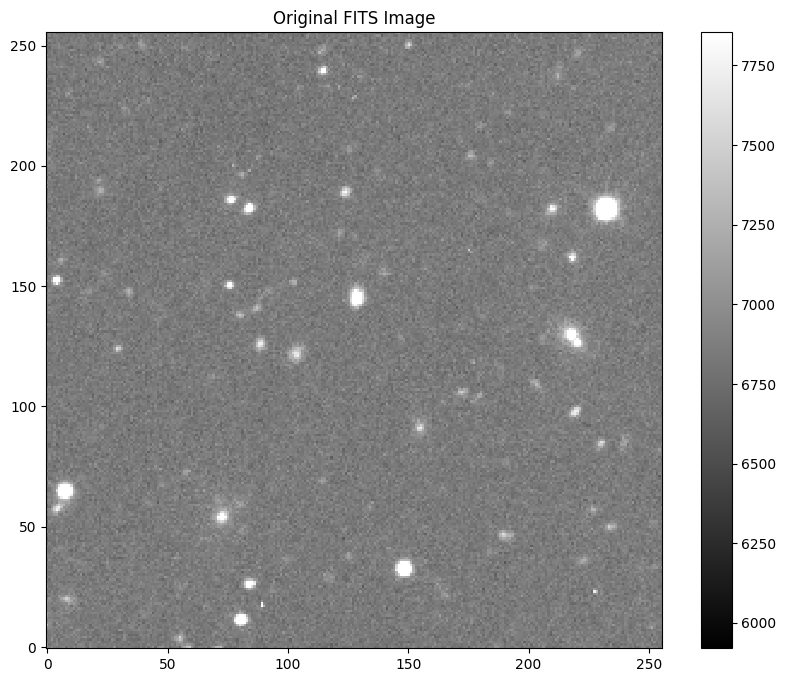

In [39]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.title("Original FITS Image")

# save the figure
plt.savefig("original_FIT_image.png")

#### Step 3: Background Subtraction
Compute the spatially varying background and its RMS (noise)

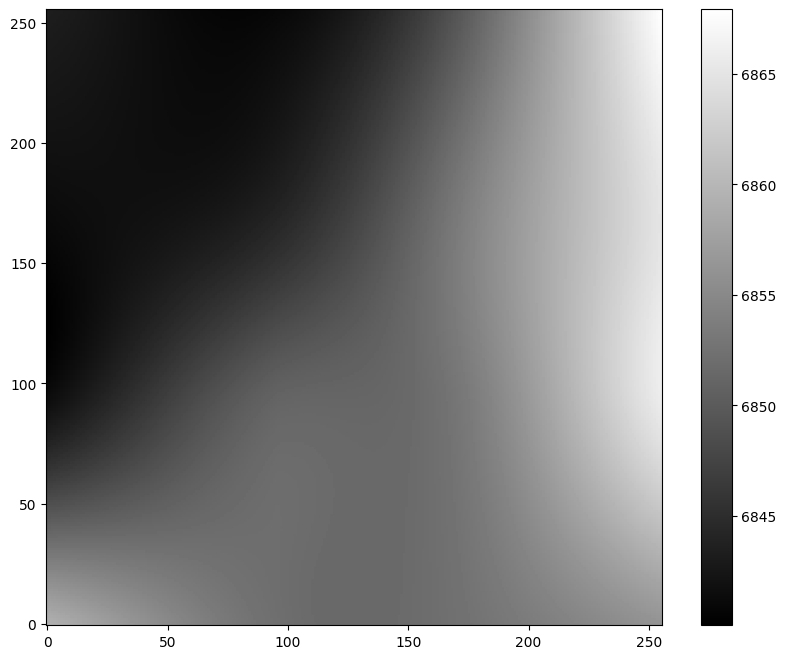

In [40]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

# save the figure
plt.savefig("background_image.png")

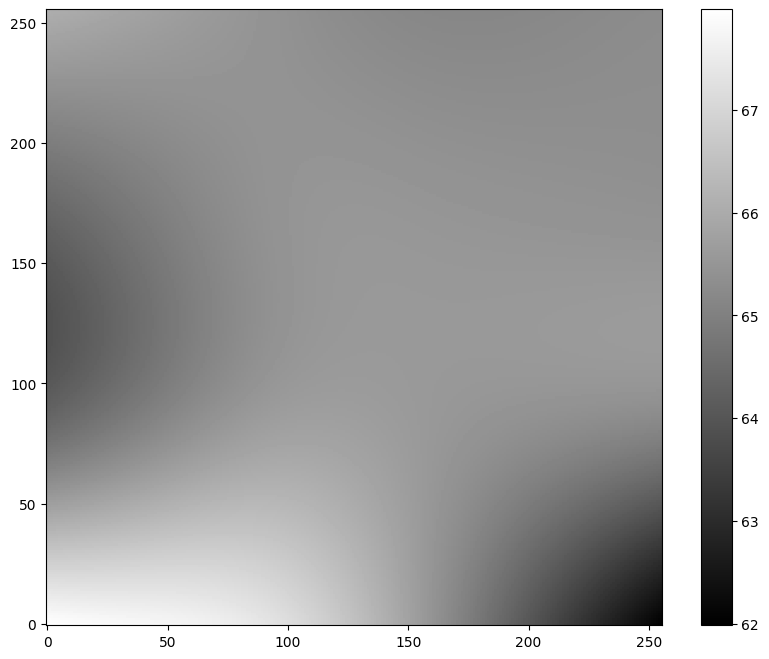

In [31]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

# save the figure
plt.savefig("background_noise.png")

#### Step 4: Subtract the Background and Detect Objects

In [15]:
# subtract the background
data_sub = data - bkg

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

#### Step 5: Plot Detected Objects

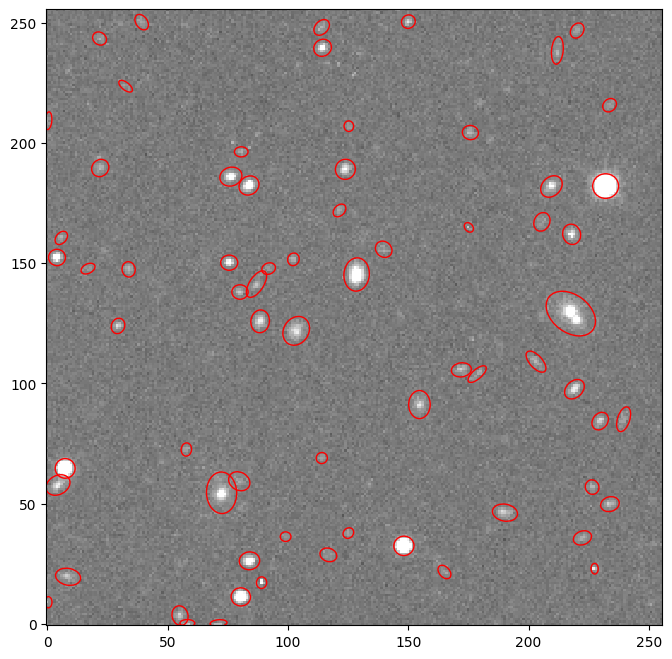

In [32]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
# save the figure
plt.savefig("detected_objects.png")

#### Part 6: performing simple circular aperture photometry

In [18]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [19]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138


## Part 2: Following the Tutorial with UDF f105w image

In [33]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [49]:
with fits.open("f105w.fits") as hdul:
    data = hdul[0].data

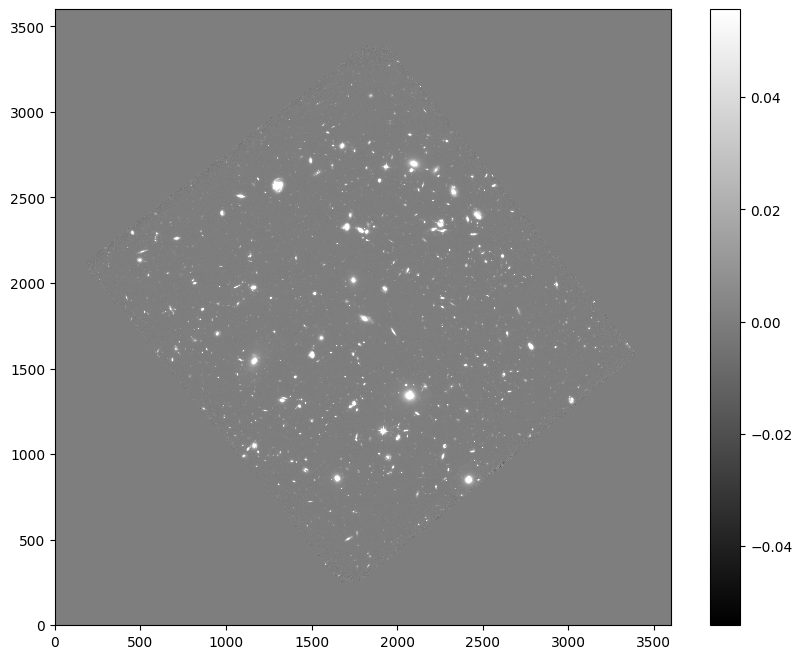

In [63]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

# save the figure
plt.savefig("f105w_original_FIT_image.png")

In [52]:
data = data.byteswap().newbyteorder()

# measure a spatially varying background on the image
bkg = sep.Background(data)

In [53]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

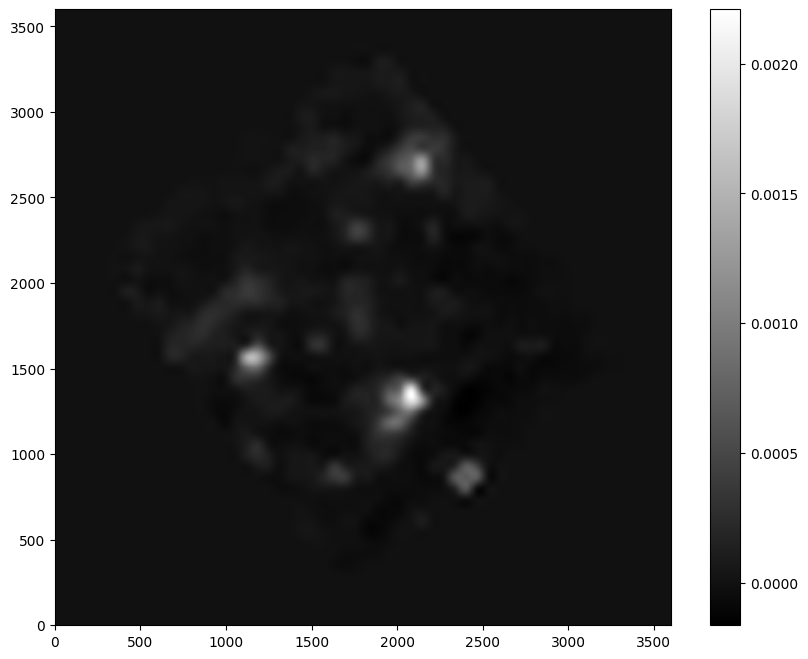

In [64]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

# save the figure
plt.savefig("f105w_background_image.png")

In [55]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

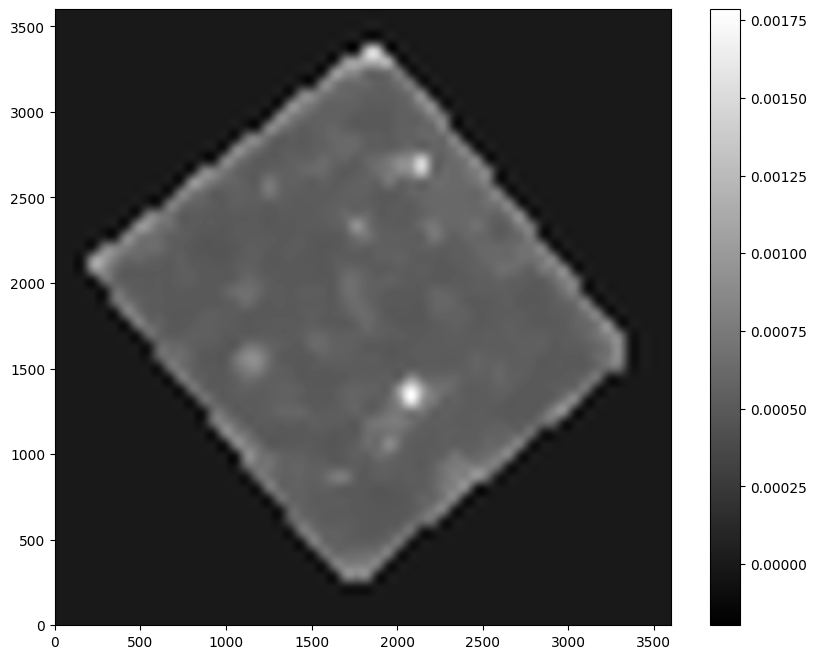

In [65]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

# save the figure
plt.savefig("f105w_background_noise.png")

In [57]:
# subtract the background
data_sub = data - bkg

In [58]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

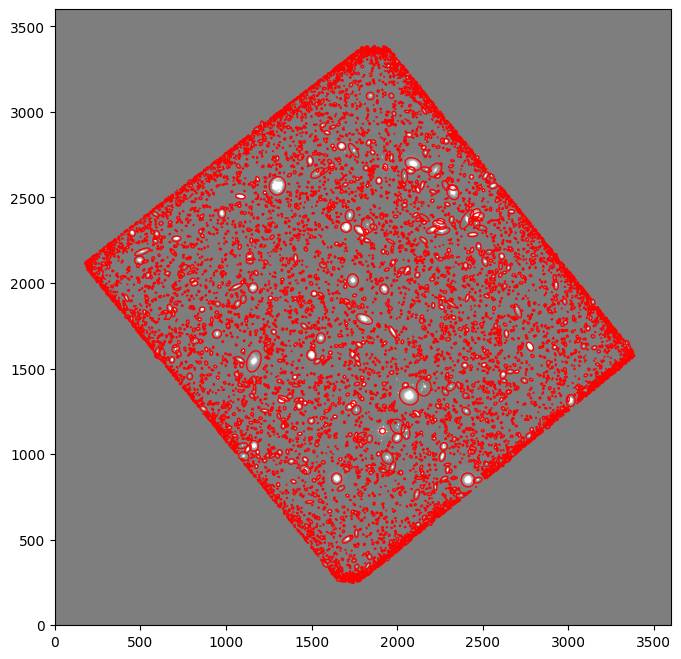

In [66]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
# save the figure
plt.savefig("f105w_detected_objects.png")

We found 8643 objects


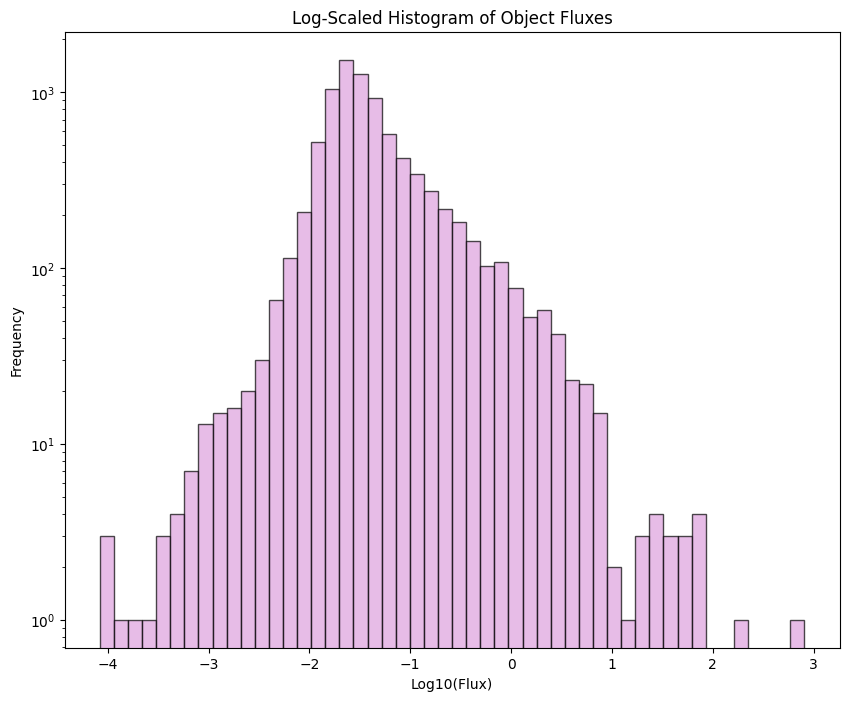

In [76]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

print(f"We found {len(objects)} objects") 

# Remove invalid flux values and negatives
flux = flux[np.isfinite(flux) & (flux > 0)]

# Log-transform fluxes
logflux = np.log10(flux)

# Logarithmic histogram
plt.hist(logflux, bins=50, color='plum', edgecolor='black', alpha=0.7, log=True)
plt.title("Log-Scaled Histogram of Object Fluxes")
plt.xlabel("Log10(Flux)")
plt.ylabel("Frequency")
plt.savefig("Histogram.png")
plt.show()

In [85]:
f_mean= np.mean(flux)
f_median= np.median(flux)
f_stdev= np.std(flux)
f_max=np.max(flux)
outlier_place=np.argmax(flux)
num_stdev= ((f_max-f_mean)/f_stdev) #num of standard deviations the outlier is from the mean

print(f"mean: {f_mean}, median: {f_median}, standard deviation: {f_stdev}")
print("")

#printing the outlier and its location in the image
large_x, large_y = objects["x"][outlier_place], objects["y"][outlier_place]
print(f"the biggest outlier in the distribution has a flux of {f_max} and is at index {outlier_place}.")
print(f"the outlier is {num_stdev} standard deviations away from the mean.")
print(f"in the image, the outlier is found at position: ({large_x}, {large_y})")

mean: 0.3692145798550599, median: 0.03167231078230544, standard deviation: 9.333468265355759

the biggest outlier in the distribution has a flux of 807.2972835731507 and is at index 2014.
the outlier is 86.45532893581209 standard deviations away from the mean.
in the image, the outlier is found at position: (2495.9184641579227, 1229.2865475899296)


## Part 3: Make a 3-Color False Image of the UDF Using RGB

In [80]:
f160w = fits.getdata("f160w.fits")
f125w = fits.getdata("f125w.fits")
f105w = fits.getdata("f105w.fits")

In [81]:
# Normalize each image to prepare for RGB mapping
def normalize_image(image, scale_min=None, scale_max=None):
    """Normalize the image data for RGB mapping."""
    if scale_min is None:
        scale_min = np.percentile(image, 1)  # 1% percentile
    if scale_max is None:
        scale_max = np.percentile(image, 99)  # 99% percentile
    normalized = np.clip((image - scale_min) / (scale_max - scale_min), 0, 1)
    return normalized

r = normalize_image(f160w)
g = normalize_image(f125w)
b = normalize_image(f105w)

In [82]:
# Stack the normalized images into an RGB image
rgb_image = np.dstack((r, g, b))

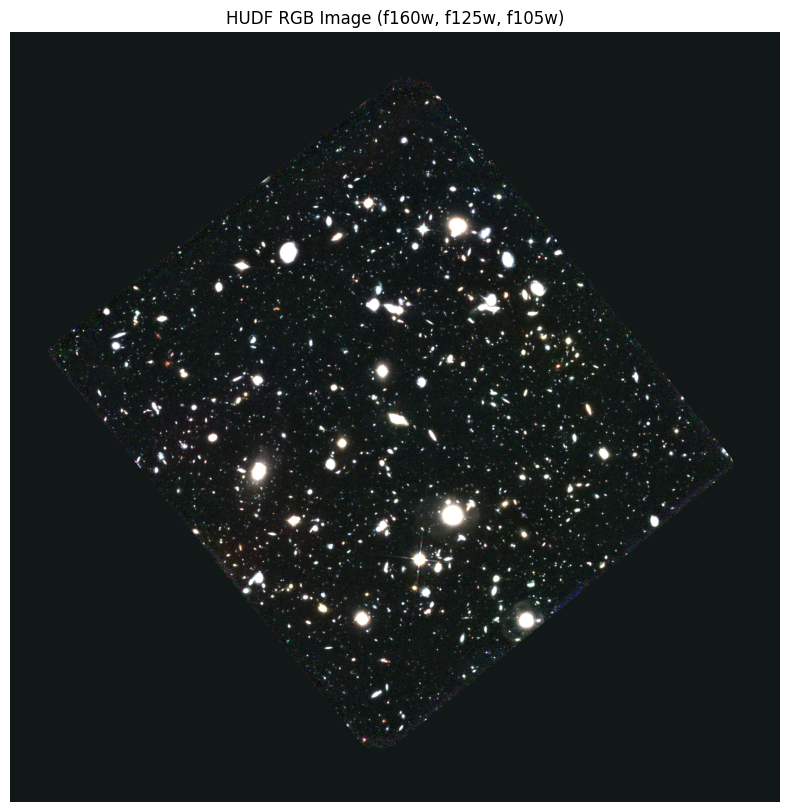

In [83]:
# Display the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.axis('off')  # Hide axes
plt.title("HUDF RGB Image (f160w, f125w, f105w)")

# Save the image as a PNG file
plt.savefig("HUDF_RGB_image.png", dpi=300, bbox_inches='tight')
plt.show()